In [5]:
import numpy as np
import random
import time

class Particle:
    swarm_best_position = None
    swarm_best_value = float('inf')

    def __init__(self, T, m, execution_times, c_inertia, c_social, c_cognitive):
        self.T = T
        self.m = m
        self.execution_times = execution_times
        self.c_inertia = c_inertia
        self.c_social = c_social
        self.c_cognitive = c_cognitive

        #Čestice se "kreću" kroz prostor rešenja tako što:
        # pamte inerciju (da ne skreću naglo),
        # povlače se ka najboljem rešenju u roju (social deo).
        # povlače se ka svom najboljem rešenju (cognitive deo),
        # Cilj = da ceo roj postepeno konvergira ka globalnom optimumu (najbolji raspored, tj. minimalni makespan).

        self.position = np.random.randint(0, m, size=T)
        self.velocity = np.random.uniform(-1, 1, size=T)
        self.value = self.calculate_completion_time()

        self.personal_best_position = self.position.copy()
        self.personal_best_value = self.value

        if Particle.swarm_best_position is None or self.value < Particle.swarm_best_value:
            Particle.swarm_best_position = self.position.copy()
            Particle.swarm_best_value = self.value

    def calculate_completion_time(self):
        processor_times = [0] * self.m
        for task, processor in enumerate(self.position):
            processor_times[processor] += self.execution_times[task][processor]
        return max(processor_times)

    def update_velocity(self):

        # position = np.array([0, 1, 0, 1])  # trenutno gde je zadatak dodeljen
        # velocity = np.array([0.1, -0.2, 0.05, 0.0])  # trenutna brzina
        
        # np.random.random(n) → pravi niz od n slučajnih brojeva između 0 i 1.
        # Dakle:
        # r_s → slučajni faktori za socijalnu komponentu (uticaj najboljeg u roju).
        # r_c → slučajni faktori za kognitivnu komponentu (uticaj sopstvenog najboljeg rešenja).
        r_s = np.random.random(len(self.position)) # npr: [0.6, 0.3, 0.9, 0.5]
        r_c = np.random.random(len(self.position)) # npr: [0.2, 0.8, 0.4, 0.1]
        social_velocity = self.c_social * r_s * (Particle.swarm_best_position - self.position) 
        # Particle.swarm_best_position - position = [1, 0, 0, 1] - [0, 1, 0, 1] = [1, -1, 0, 0]
        # social_velocity = 1.5 * [0.6, 0.3, 0.9, 0.5] * [1, -1, 0, 0] = [0.9, -0.45, 0, 0]
        cognitive_velocity = self.c_cognitive * r_c * (self.personal_best_position - self.position)
        # personal_best_position - position = [0,0,1,1] - [0,1,0,1] = [0,-1,1,0]
        # cognitive_velocity = 1.5 * [0.2,0.8,0.4,0.1] * [0,-1,1,0] = [0, -1.2, 0.6, 0]
        self.velocity = self.c_inertia * self.velocity + social_velocity + cognitive_velocity
        # velocity = [0.07, -0.14, 0.035, 0.0] + [0.9, -0.45, 0, 0] + [0, -1.2, 0.6, 0] = [0.97, -1.79, 0.635, 0.0]

    def move(self):
        self.update_velocity()
        self.position = np.clip(self.position + self.velocity, 0, self.m - 1).astype(int)
        # position + velocity = [0,1,0,1] + [0.97, -1.79, 0.635, 0.0] = [0.97, -0.79, 0.635, 1.0]
        # [0.97, 0, 0.635, 1.0] -> [0, 0, 0, 1]
        self.value = self.calculate_completion_time()

        if self.value < self.personal_best_value:
            self.personal_best_position = self.position.copy()
            self.personal_best_value = self.value
            if self.value < Particle.swarm_best_value:
                Particle.swarm_best_position = self.position.copy()
                Particle.swarm_best_value = self.value

In [6]:
import matplotlib.pyplot as plt

def plot_schedule_gantt(schedule, execution_times, m):
    """
    Nacrtaj Gantt dijagram za raspored (schedule).
    schedule[i] = procesor kojem je dodeljen task i
    execution_times[i][j] = trajanje taska i na procesoru j.
    """
    processor_times = [0] * m  # kada procesor postaje slobodan

    fig, ax = plt.subplots(figsize=(10, 5))

    for task, processor in enumerate(schedule):
        start_time = processor_times[processor]
        duration = execution_times[task][processor]
        finish_time = start_time + duration

        # crtamo task kao pravougaonik
        ax.barh(processor, duration, left=start_time, height=0.4)

        # task ID pišemo u sredini
        ax.text(start_time + duration/2, processor, f"T{task}", 
                va='center', ha='center', color="white", fontsize=8)

        # update kraja procesora
        processor_times[processor] = finish_time

    ax.set_xlabel("Vreme")
    ax.set_ylabel("Procesor")
    ax.set_title("Gantt dijagram - raspored zadataka")
    ax.set_yticks(range(m))
    ax.set_yticklabels([f"P{j}" for j in range(m)])
    plt.show()


PSO testovi...

Testiram za T = 4, m = 2...


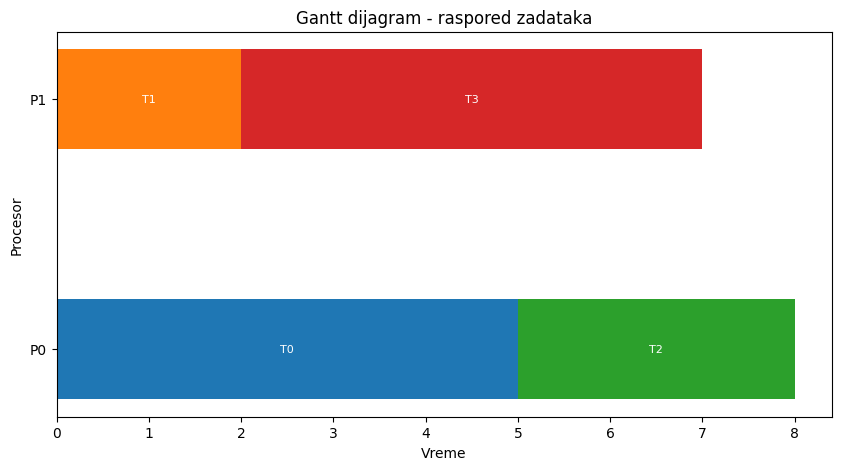

  -> Završeno za 0.17 sekundi. Najbolje pronađeno vreme: 8

Testiram za T = 6, m = 3...


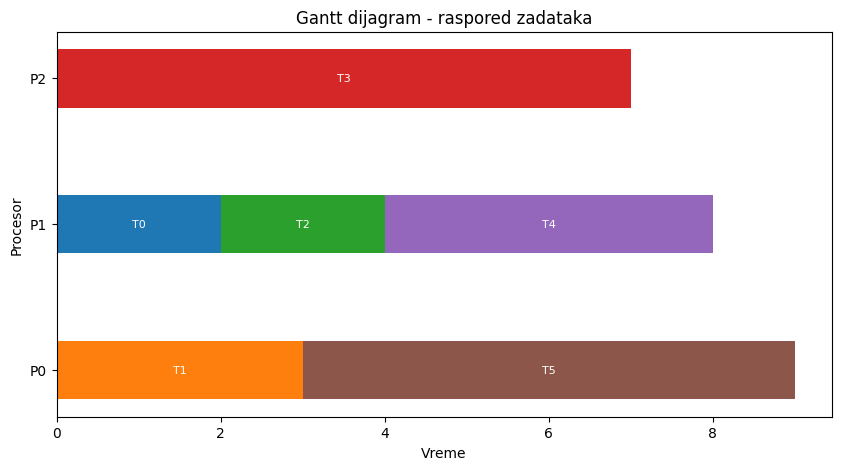

  -> Završeno za 0.13 sekundi. Najbolje pronađeno vreme: 9

Testiram za T = 8, m = 4...


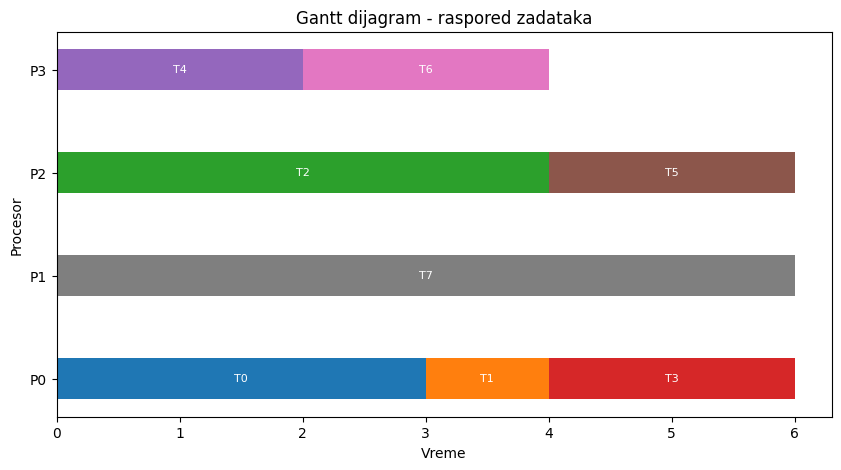

  -> Završeno za 0.13 sekundi. Najbolje pronađeno vreme: 6

Testiram za T = 10, m = 5...


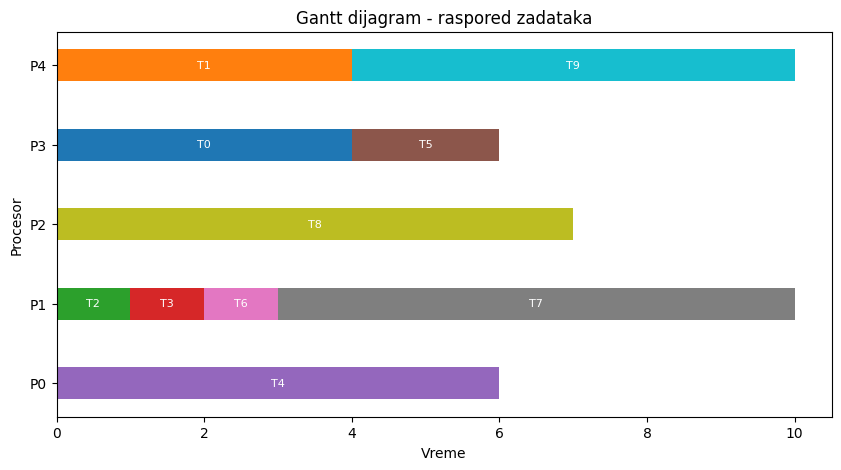

  -> Završeno za 0.11 sekundi. Najbolje pronađeno vreme: 10

Testiram za T = 15, m = 6...


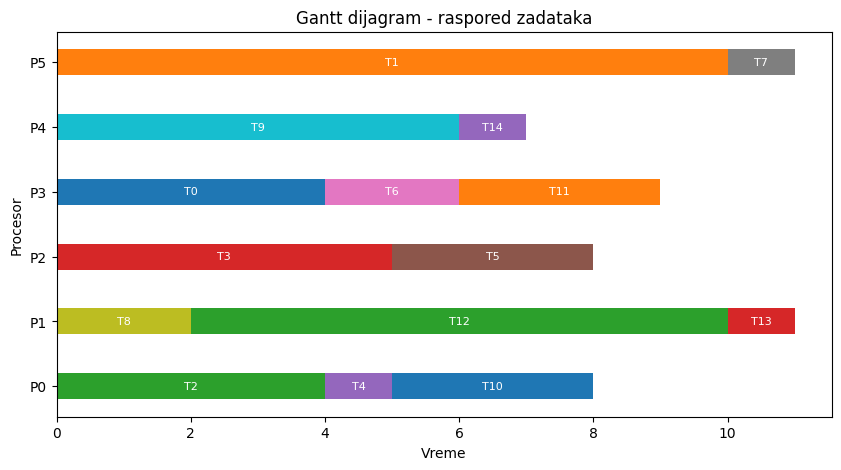

  -> Završeno za 0.14 sekundi. Najbolje pronađeno vreme: 11

Rezultati testova:

Za T = 4, m = 2: Završeno za 0.17 sekundi. Najbolje vreme: 8
Za T = 6, m = 3: Završeno za 0.13 sekundi. Najbolje vreme: 9
Za T = 8, m = 4: Završeno za 0.13 sekundi. Najbolje vreme: 6
Za T = 10, m = 5: Završeno za 0.11 sekundi. Najbolje vreme: 10
Za T = 15, m = 6: Završeno za 0.14 sekundi. Najbolje vreme: 11


In [7]:
def pso(T, m, execution_times, num_iters, swarm_size, c_inertia, c_social, c_cognitive):
    Particle.swarm_best_position = None
    Particle.swarm_best_value = float('inf')
    
    swarm = [Particle(T, m, execution_times, c_inertia, c_social, c_cognitive) for _ in range(swarm_size)]
    for _ in range(num_iters):
        for p in swarm:
            p.move()
    
    return Particle.swarm_best_position, Particle.swarm_best_value

# Testiranje različitih ulaza
test_cases = [
    (4, 2),
    (6, 3),
    (8, 4),
    (10, 5),
    (15, 6),
]

results = []

print("PSO testovi...\n")
for T, m in test_cases:
    execution_times = [[random.randint(1, 10) for _ in range(m)] for _ in range(T)]
    print(f"Testiram za T = {T}, m = {m}...")
    
    start_time = time.time()
    best_schedule, best_time = pso(T, m, execution_times, num_iters=100, swarm_size=30, c_inertia=0.7, c_social=1.5, c_cognitive=1.5)
    plot_schedule_gantt(best_schedule, execution_times, m)
    execution_duration = time.time() - start_time
    
    results.append((T, m, execution_duration, best_time))
    print(f"  -> Završeno za {execution_duration:.2f} sekundi. Najbolje pronađeno vreme: {best_time}\n")

print("Rezultati testova:\n")
for T, m, duration, best_time in results:
    print(f"Za T = {T}, m = {m}: Završeno za {duration:.2f} sekundi. Najbolje vreme: {best_time}")
